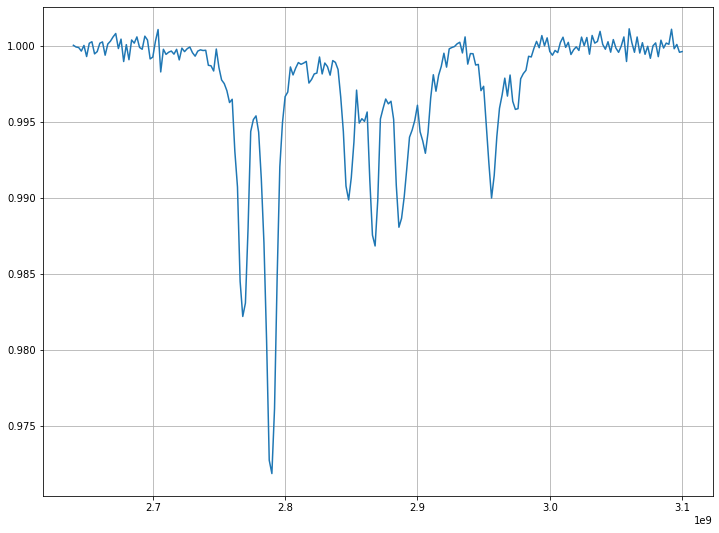

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math
import uncertainties as unc

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg



data = pd.read_csv('out2.csv')
regionMin = 736.2
regionMax = 737.2

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['xdata'],data['ydata'])


# Plot with index

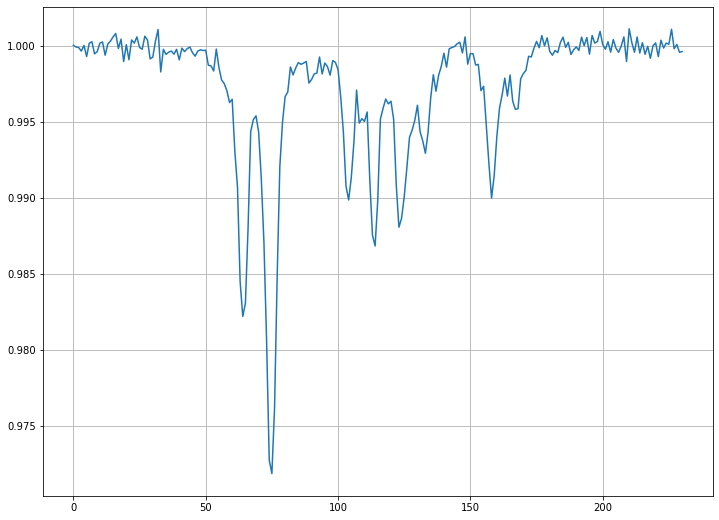

In [26]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'])

# isolate each peak

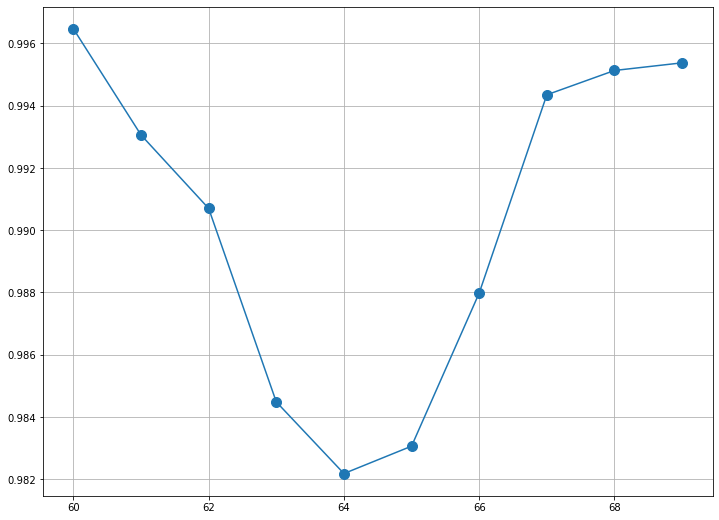

In [27]:
Index = list(range(60,70))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [28]:
data['xdata'][64]

2768000000

### first peak: index 64; 2.768 GHz

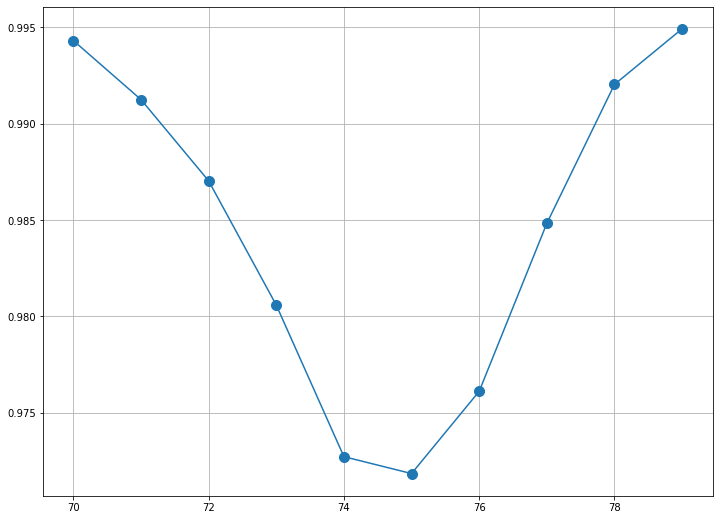

In [29]:
Index = list(range(70,80))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [30]:
data['xdata'][75]

2790000000

### second peak: index 75; 2.79 GHz

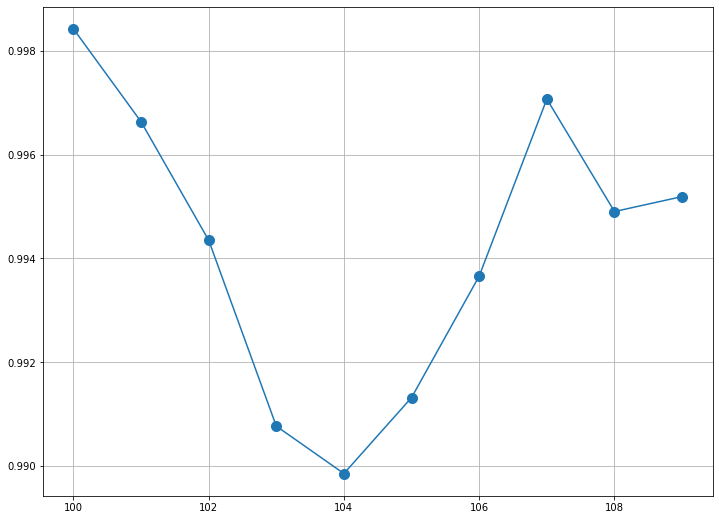

In [31]:
Index = list(range(100,110))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [32]:
data['xdata'][104]

2848000000

### third peak: index 104; 2.848 GHz

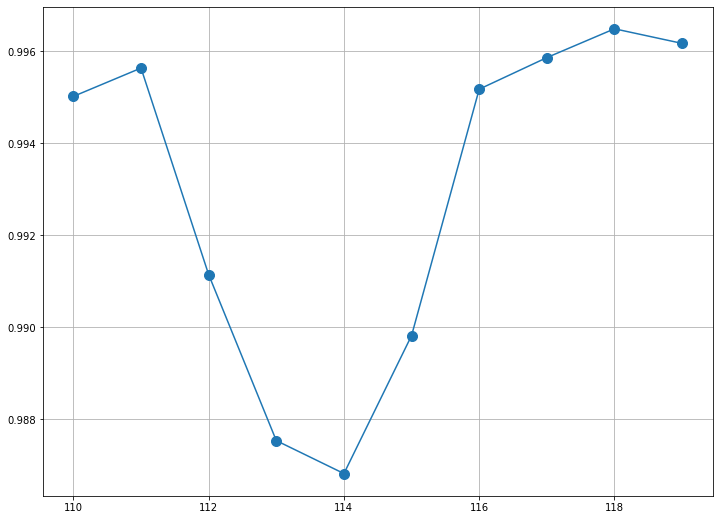

In [33]:
Index = list(range(110,120))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [34]:
(data['xdata'][113]+data['xdata'][114])/2

2867000000.0

### fourth peak: 2.867 GHz

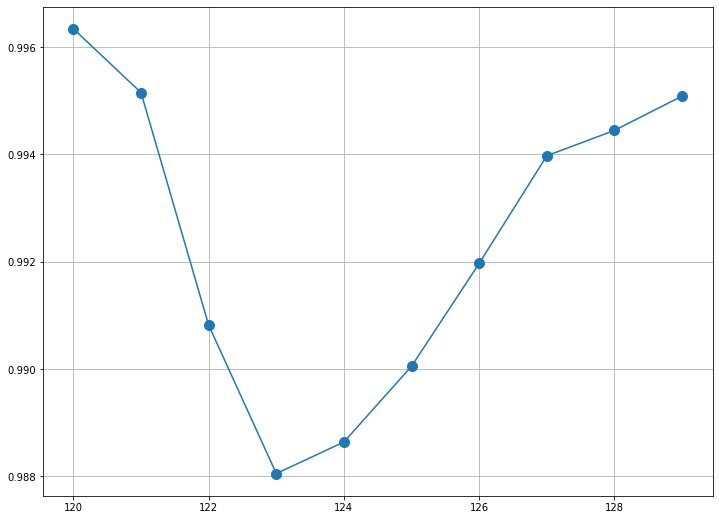

In [35]:
Index = list(range(120,130))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [36]:
data['xdata'][124]

2888000000

### fifth peak: 2.888 GHz

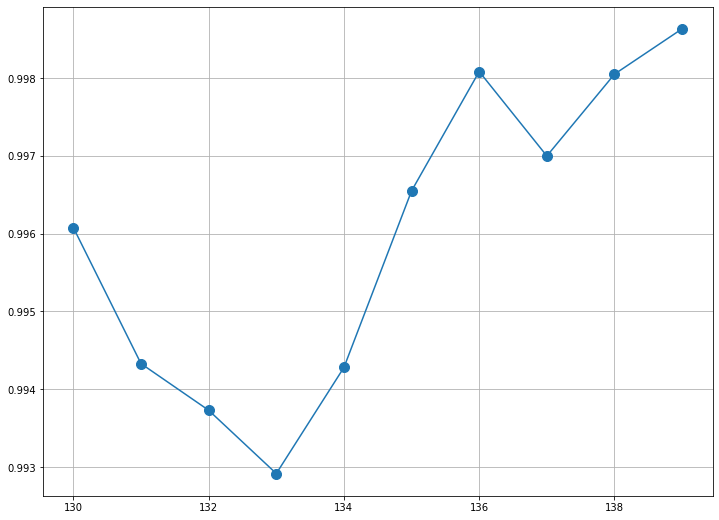

In [37]:
Index = list(range(130,140))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [38]:
data['xdata'][132]

2904000000

### sixth peak: 2.904 GHz

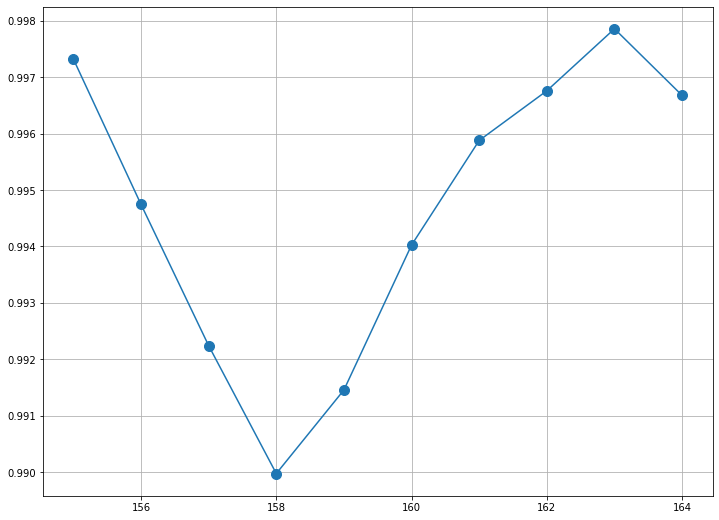

In [39]:
Index = list(range(155,165))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [40]:
(data['xdata'][158]+data['xdata'][159])/2

2957000000.0

### seventh peak: 2.957 GHz

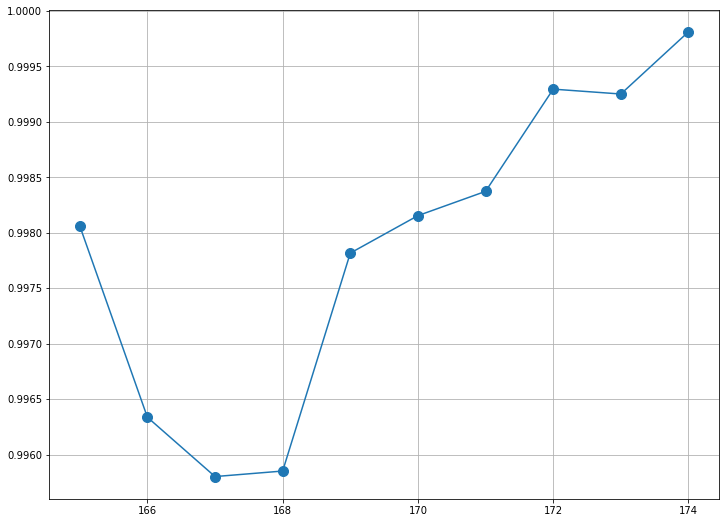

In [41]:
Index = list(range(165,175))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'][Index],'.-',markersize = 20);

In [42]:
data['xdata'][166]

2972000000

### eighth peak: 2.972 GHz

# fit ODMR data

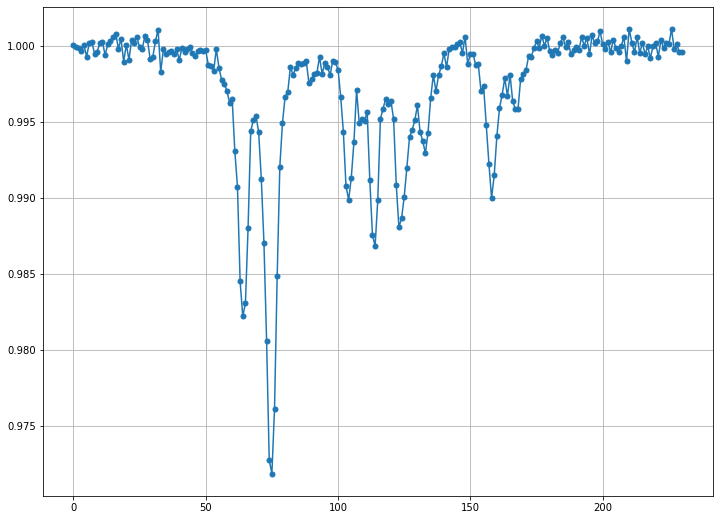

In [43]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['ydata'],'.-',markersize = 10);

## fit the first peak first

[[Model]]
    (Model(parabolic) - (((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_')) + Model(lorentzian, prefix='p8_')))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 176
    # data points      = 231
    # variables        = 24
    chi-square         = 9.8403e-05
    reduced chi-square = 4.7538e-07
    Akaike info crit   = -3340.50512
    Bayesian info crit = -3257.88710
    R-squared          = 0.98018755
[[Variables]]
    a:             0 (fixed)
    b:             0 (fixed)
    c:             1 (fixed)
    p1_amplitude:  222945.802 +/- 7621.91851 (3.42%) (init = 250000.6)
    p1_center:     2.7681e+09 +/- 124839.579 (0.00%) (init = 2.7678e+09)
    p1_sigma:      3990098.67 +/- 185871.980 (4.66%) (init = 5118679)
    p2_amplitude:  389009.504 +/- 7843.93211 (

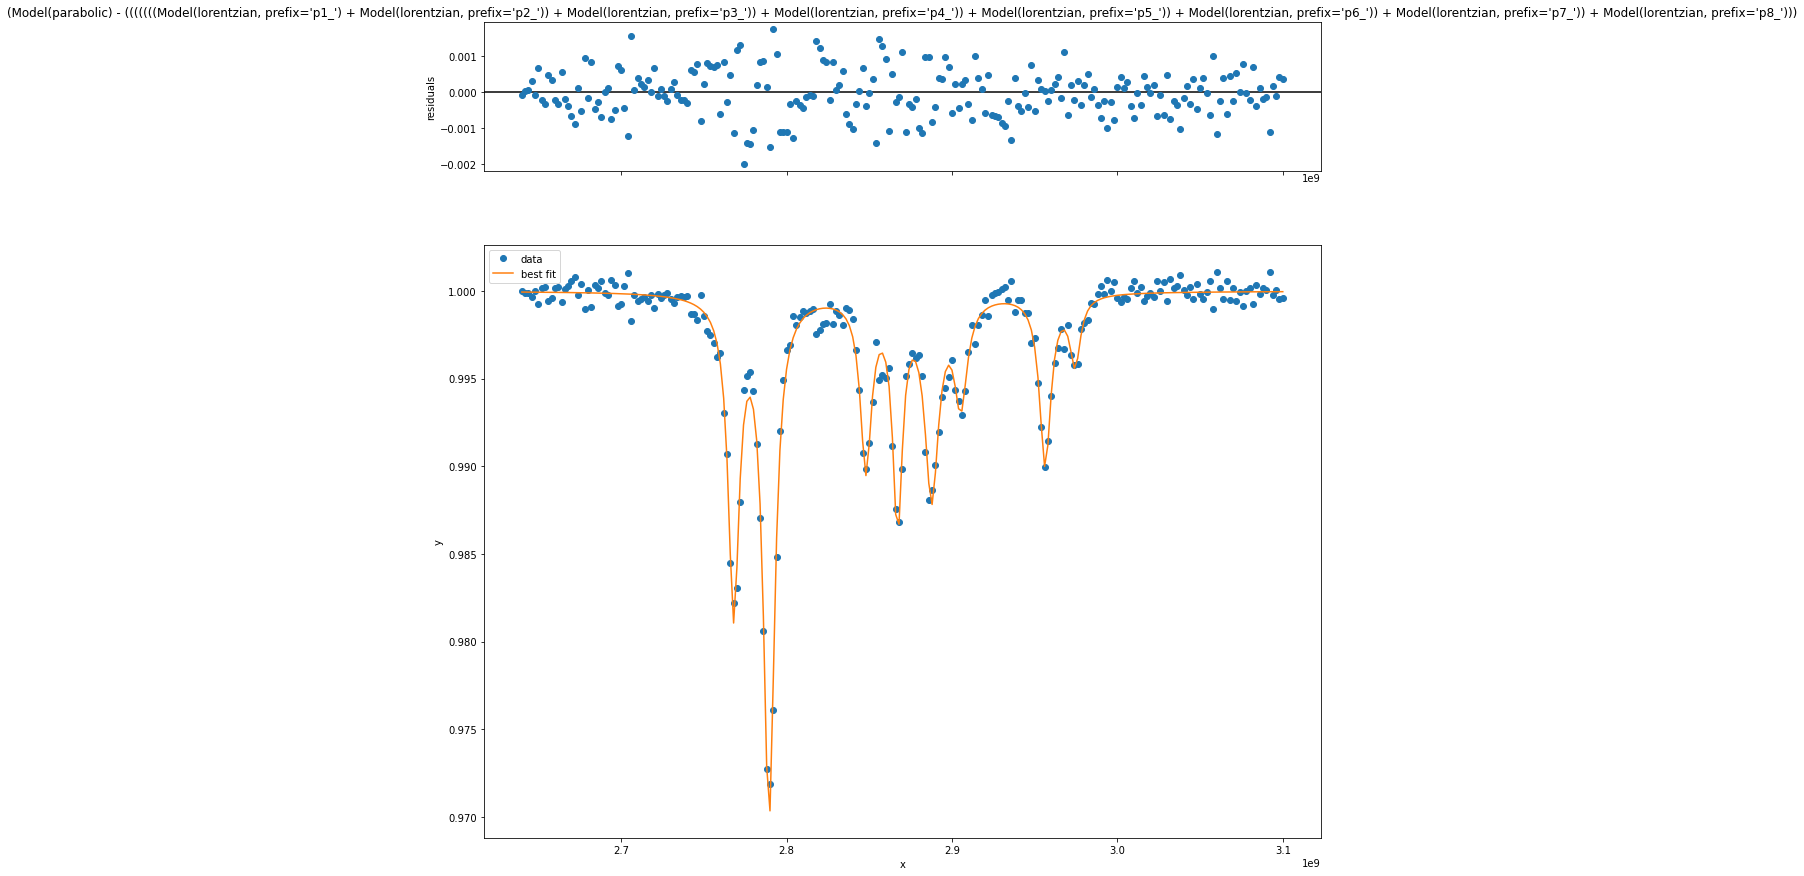

In [44]:
# Index = list(range(0,145))

model1 = QuadraticModel() - (LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_')+\
                             LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_') + LorentzianModel(prefix='p7_') + LorentzianModel(prefix='p8_'))

model = model1
params = model.make_params()

params['p1_center'].set(value=2.7678e9, vary=True)
params['p1_amplitude'].set(value=250000.636, min=0, vary=True)
params['p1_sigma'].set(value=5118679.32, vary=True)

params['p2_center'].set(value=2.7889e9, vary=True)
params['p2_amplitude'].set(value= 319260.128, min = 0,vary=True)
params['p2_sigma'].set(value=4200593.55, vary=True)

params['p3_center'].set(value=2.8479e9, vary=True)
params['p3_amplitude'].set(value=117247.147, min=0, vary=True)
params['p3_sigma'].set(value=5387519.00, vary=True)

params['p4_center'].set(value=2.8671e9, vary=True)
params['p4_amplitude'].set(value= 225944.777, min = 0,vary=True)
params['p4_sigma'].set(value=4308865.42, vary=True)

params['p5_center'].set(value=2.8874e+09, vary=True)
params['p5_amplitude'].set(value=170372.448, min=0, vary=True)
params['p5_sigma'].set(value=3719244.90, vary=True)

params['p6_center'].set(value=2.9048e+09, vary=True)
params['p6_amplitude'].set(value= 63173.5876, min = 0,vary=True)
params['p6_sigma'].set(value=4625796.64, vary=True)

params['p7_center'].set(value=2.9571e+09, vary=True)
params['p7_amplitude'].set(value=209196.905, min=0, vary=True)
params['p7_sigma'].set(value=4766217.27, vary=True)

params['p8_center'].set(value=2.9729e+09, vary=True)
params['p8_amplitude'].set(value= 30000.7193, min = 0,vary=True)
params['p8_sigma'].set(value= 1578210.22, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=False)
params['c'].set(value=1, vary=False)

# include a weight for small peaks

# result = model.fit(data['ydata'], params, x=data['xdata'], weights=1/(1-np.sqrt(data['ydata'])))
# result = model.fit(data['ydata'][Index], params, x=data['xdata'][Index])
result = model.fit(data['ydata'], params, x=data['xdata'])

print(result.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result.plot(fig=myfig);


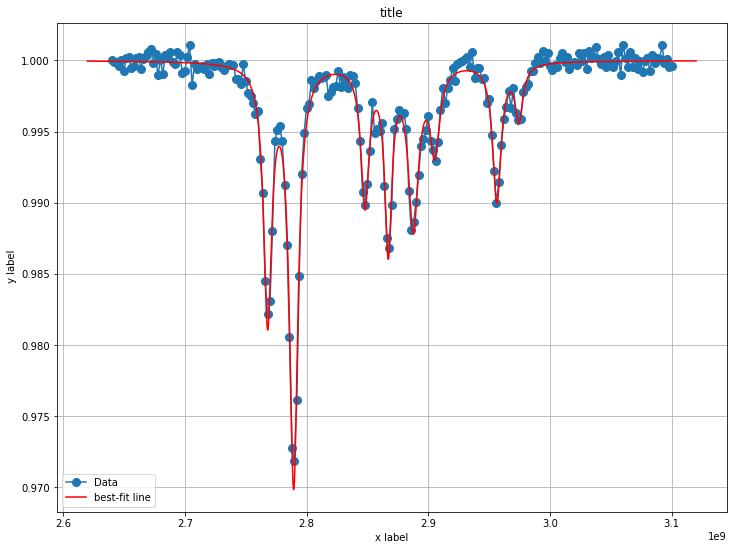

In [45]:
fit_x = np.linspace(2.62e9,3.12e9,2000)
fitline = result.eval(result.params, x = fit_x)
plt.figure(figsize=(12,9))
plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data['xdata'], data['ydata'],'o-',markersize = 8, label='Data')
plt.plot(fit_x, fitline, '-r',label = 'best-fit line')
plt.legend()

# final plot

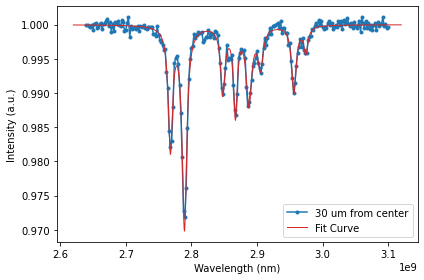

In [46]:
# plt.rcParams.update({'font.size': 6})
# cm = 1/2.54 
# fig = plt.figure(figsize=(8.5*cm, 4*cm))
plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Intensity (a.u.)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data['xdata'], data['ydata'],'o-C0',markersize = 3, label='30 um from center')
plt.plot(fit_x, fitline, '-C3',linewidth = 1, label = 'Fit Curve')
plt.legend()


plt.tight_layout()

# fig.savefig('20umOut.eps', format= 'eps',transparent=True)

In [47]:
avarage = (result.params.eval('p1_fwhm')+result.params.eval('p2_fwhm')+result.params.eval('p3_fwhm')+result.params.eval('p4_fwhm')+result.params.eval('p5_fwhm')+result.params.eval('p6_fwhm')+result.params.eval('p7_fwhm')+result.params.eval('p8_fwhm'))/8

In [49]:
avarage

8365947.059089118